In [228]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [229]:

df_train=pd.read_csv('tested.csv')# import the csv file
df_train.head(100)# read the csv file

PassengerId  Survived  Pclass  \
0           892         0       3   
1           893         1       3   
2           894         0       2   
3           895         0       3   
4           896         1       3   
..          ...       ...     ...   
95          987         0       3   
96          988         1       1   
97          989         0       3   
98          990         1       3   
99          991         0       3   

                                                 Name     Sex   Age  SibSp  \
0                                    Kelly, Mr. James    male  34.5      0   
1                    Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2                           Myles, Mr. Thomas Francis    male  62.0      0   
3                                    Wirz, Mr. Albert    male  27.0      0   
4        Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1   
..                                                ...     ...   ...    ...   
95                         Tenglin, Mr. Gunnar Isidor    male  25.0      0   
96  Cavendish, Mrs. Tyrell William (Julia Florence...  female  76.0      1   
97                          Makinen, Mr. Kalle Edvard    male  29.0      0   
98                       Braf, Miss. Elin Ester Maria  female  20.0      0   
99                       Nancarrow, Mr. William Henry    male  33.0      0   

    Parch             Ticket     Fare Cabin Embarked  
0       0             330911   7.8292   NaN        Q  
1       0             363272   7.0000   NaN        S  
2       0             240276   9.6875   NaN        Q  
3       0             315154   8.6625   NaN        S  
4       1            3101298  12.2875   NaN        S  
..    ...                ...      ...   ...      ...  
95      0             350033   7.7958   NaN        S  
96      0              19877  78.8500   C46        S  
97      0  STON/O 2. 3101268   7.9250   NaN        S  
98      0             347471   7.8542   NaN        S  
99      0         A./5. 3338   8.0500   NaN        S  

[100 rows x 12 columns]

In [230]:
df_train.describe()# used to the aggreagte value of numerical column

PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200

In [231]:
df_train.shape # used to identify the rows and columns in the dataframe

(418, 12)

In [232]:
for i in df_train.columns:# this code use to get the column name
    print(i)

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [233]:
# Data Cleaning

In [234]:
missed_vales=df_train.isnull().sum()#identify the misisng values in dataset
missed_vales

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [235]:
df_train["Cabin"].value_counts()# Value_counts() used for the number occurence of the record in the particular column

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [236]:
len(df_train)

418

In [237]:
missed_vales/len(df_train) * 100 # percentage  of missing values

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [238]:
df_train.dropna(subset = ['Fare'], inplace=True)# drop the missing values record in the Fare column


In [239]:
df_train['Cabin']=df_train['Cabin'].replace(to_replace= np.nan,value="Unknown") # replace the missing values with unknown

In [240]:
df_train.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

In [241]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mode()[0]) # treat the missing values with mode.

In [242]:
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [243]:
# Outliers are those data points that are significantly different from the rest of the dataset. here i am using the boxplot.

<Axes: >

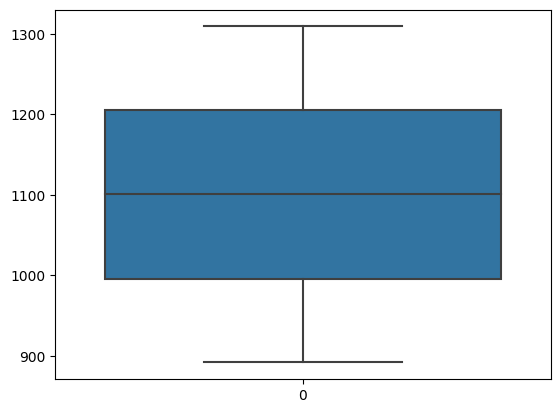

In [244]:
sns.boxplot(df_train['PassengerId']) # there is no outlier in the chart

<Axes: >

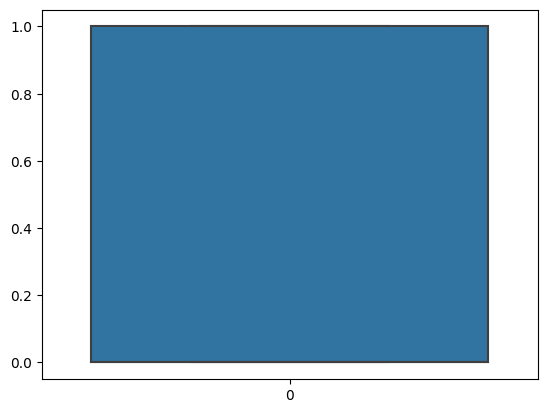

In [245]:
sns.boxplot(df_train['Survived'])

<Axes: >

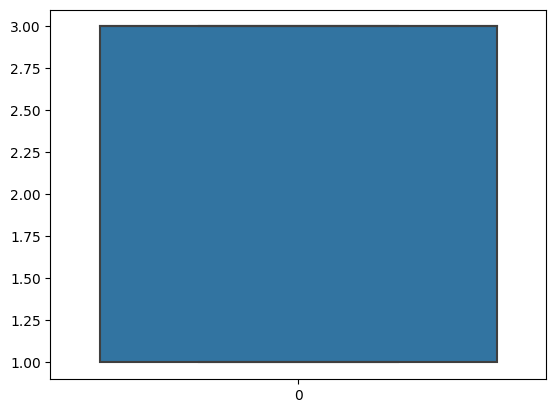

In [246]:
sns.boxplot(df_train['Pclass'])


<Axes: >

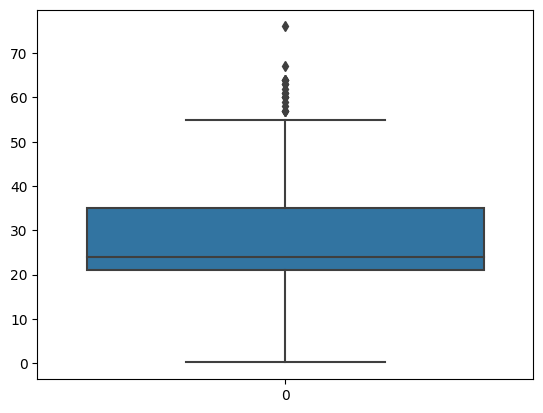

In [247]:
sns.boxplot(df_train['Age'])

<Axes: >

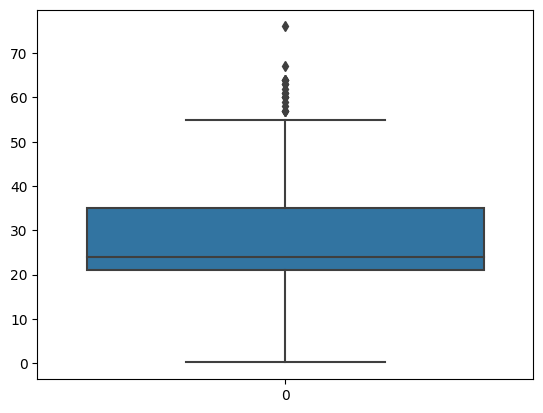

In [248]:
sns.boxplot(df_train['Age'])

In [249]:
a=np.where(df_train['Age']>55) # remove the outliers
a

(array([  2,  13,  48,  69,  81,  96, 114, 142, 178, 192, 212, 216, 235,
        304, 315, 342, 355, 386], dtype=int64),)

<Axes: >

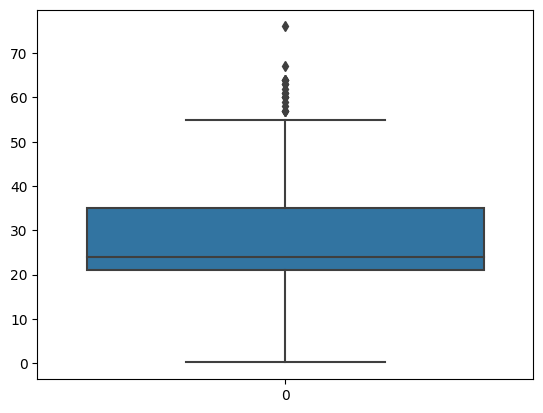

In [250]:
sns.boxplot(df_train['Age'])

In [227]:
df_train

PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  21.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...   ...    ...    ...   
413                            Spector, Mr. Woolf    male  21.0      0      0   
414                  Oliva y Ocana, Dona. Fermina  female  39.0      0      0   
415                  Saether, Mr. Simon Sivertsen    male  38.5      0      0   
416                           Ware, Mr. Frederick    male  21.0      0      0   
417                      Peter, Master. Michael J    male  21.0      1      1   

                 Ticket      Fare Cabin Embarked  
0                330911    7.8292   NaN        Q  
1                363272    7.0000   NaN        S  
2                240276    9.6875   NaN        Q  
3                315154    8.6625   NaN        S  
4               3101298   12.2875   NaN        S  
..                  ...       ...   ...      ...  
413           A.5. 3236    8.0500   NaN        S  
414            PC 17758  108.9000  C105        C  
415  SOTON/O.Q. 3101262    7.2500   NaN        S  
416              359309    8.0500   NaN        S  
417                2668   22.3583   NaN        C  

[418 rows x 12 columns]

In [223]:
df_train['Age'].value_counts()

Age
21.0    122
24.0     17
22.0     16
30.0     15
18.0     13
       ... 
7.0       1
26.5      1
28.5      1
22.5      1
38.5      1
Name: count, Length: 68, dtype: int64

In [92]:
df_train['Sex'].value_counts() 

Sex
male      265
female    152
Name: count, dtype: int64

In [94]:
df_train['Sex']=df_train['Sex'].replace('male',1) # here male replace with 1 and femlae replace with 2

In [54]:
df_train['Sex'].replace('female',2)

0      1
1      2
2      1
3      1
4      2
      ..
413    1
414    2
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

<Axes: >

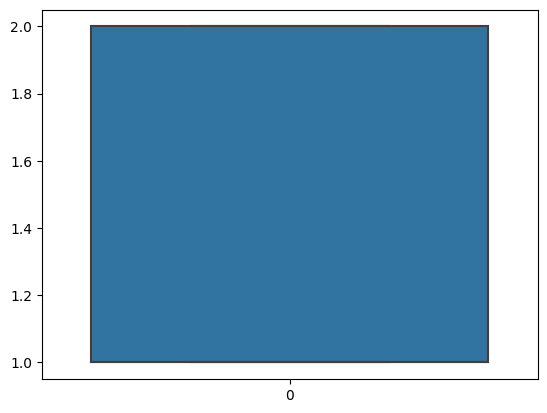

In [55]:
sns.boxplot(df_train['Sex'])

<Axes: >

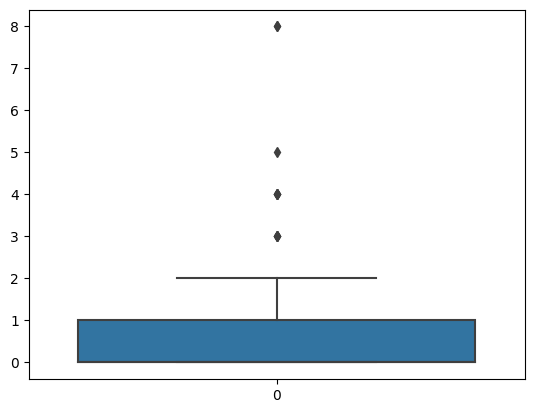

In [56]:
sns.boxplot(df_train['SibSp'])

<Axes: >

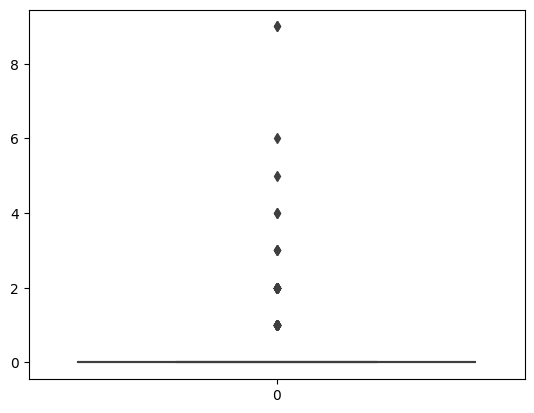

In [57]:
sns.boxplot(df_train['Parch'])

<Axes: >

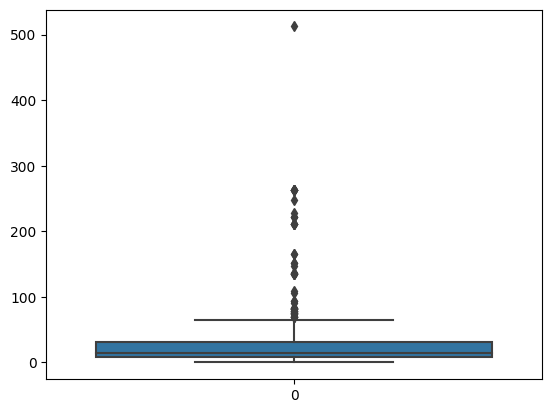

In [58]:
sns.boxplot(df_train['Fare'])

In [59]:
#Univariate anlaysis

In [60]:
#A scatter plot is a diagram where each value in the data set is represented by a dot.


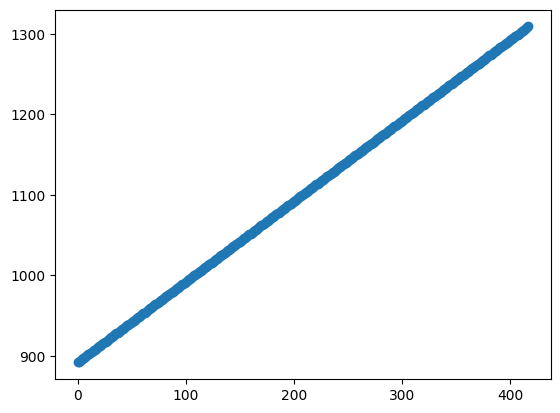

In [61]:
plt.scatter(df_train.index,df_train['PassengerId'])
plt.show()


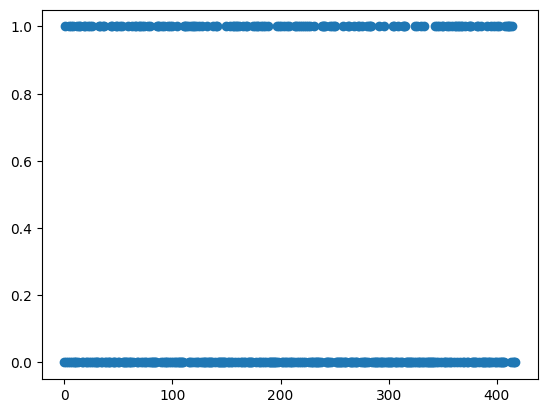

In [62]:
plt.scatter(df_train.index,df_train['Survived'])


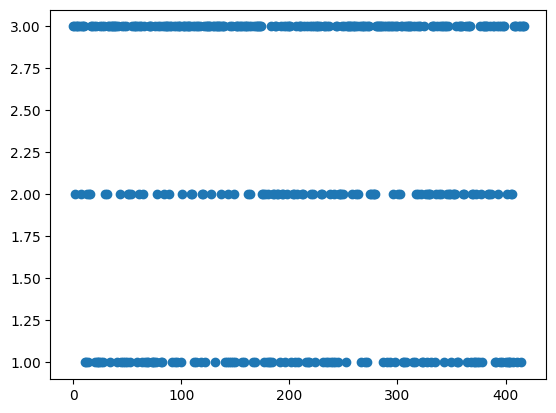

In [63]:
plt.scatter(df_train.index,df_train['Pclass'])

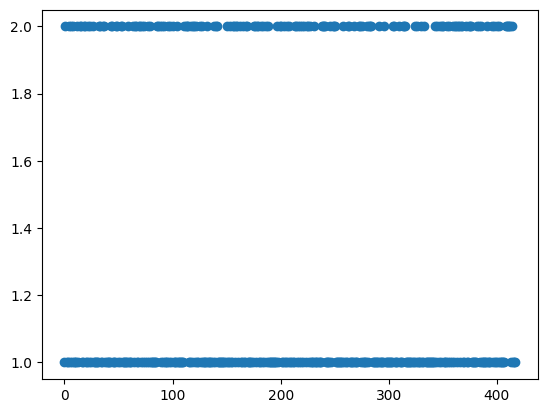

In [64]:
plt.scatter(df_train.index,df_train['Sex'])

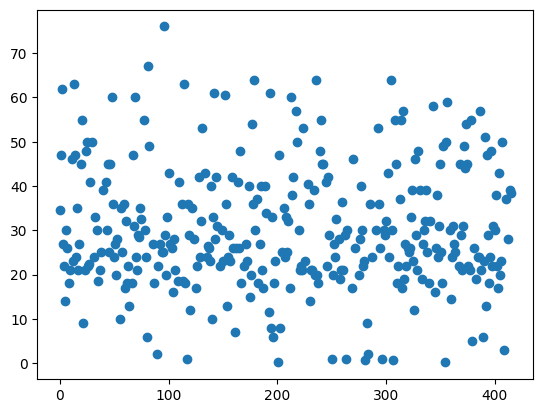

In [65]:
plt.scatter(df_train.index,df_train['Age'])

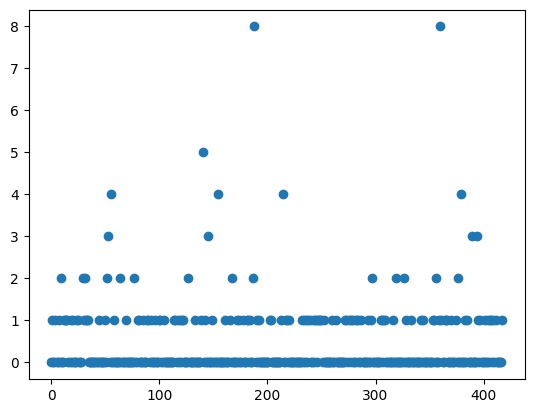

In [66]:
plt.scatter(df_train.index,df_train['SibSp'])

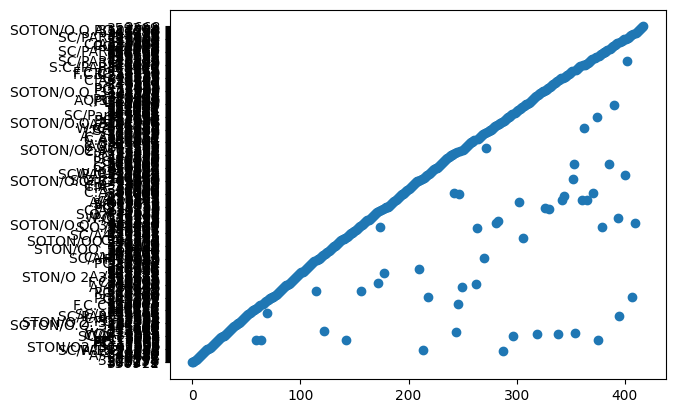

In [67]:
plt.scatter(df_train.index,df_train['Ticket'] )


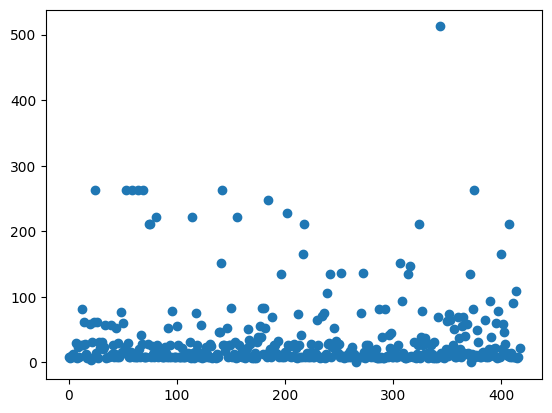

In [68]:
plt.scatter(df_train.index,df_train['Fare'])

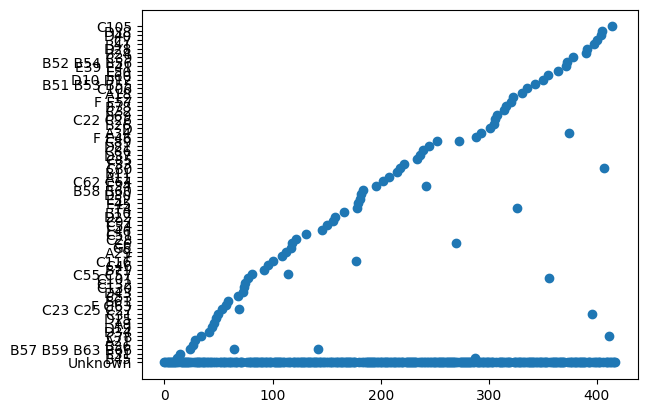

In [95]:
plt.scatter(df_train.index,df_train['Cabin'])

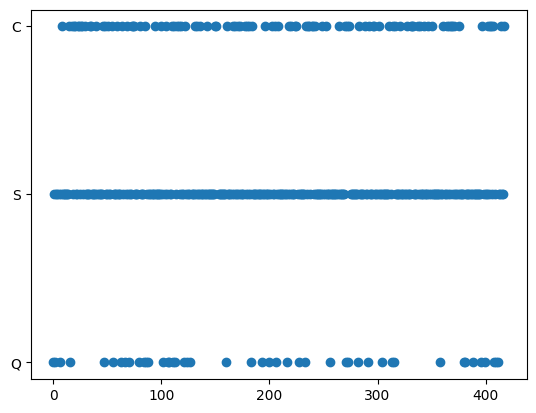

In [96]:
plt.scatter(df_train.index,df_train['Embarked'])

In [ ]:
#stripplot

<Axes: ylabel='PassengerId'>

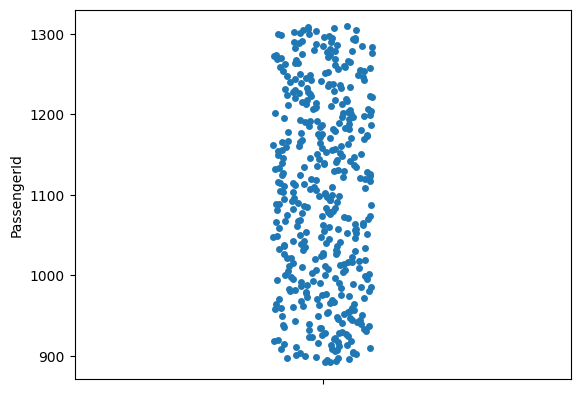

In [97]:
sns.stripplot(y=df_train['PassengerId'])

<Axes: ylabel='Survived'>

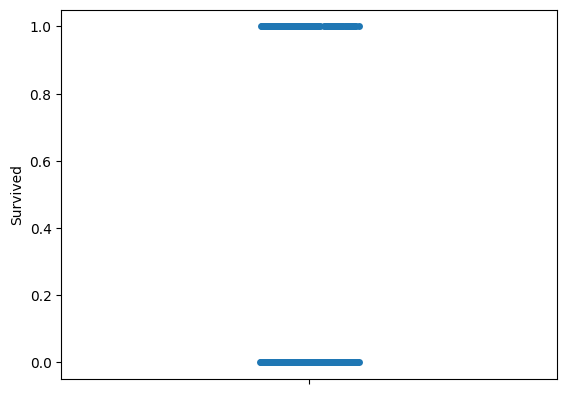

In [98]:
sns.stripplot(y=df_train['Survived'])

<Axes: ylabel='Pclass'>

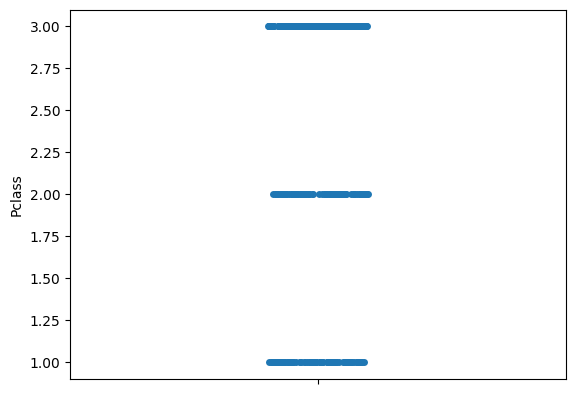

In [99]:
sns.stripplot(y=df_train['Pclass'])

<Axes: ylabel='SibSp'>

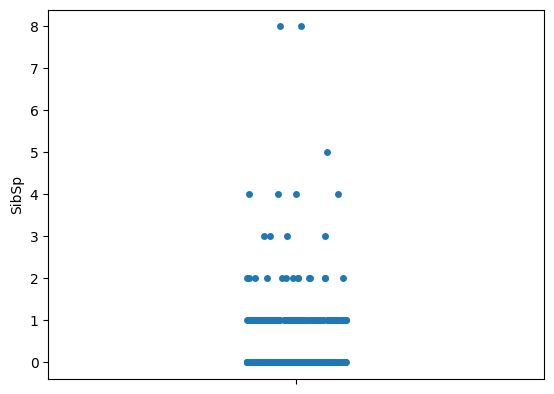

In [100]:
sns.stripplot(y=df_train['SibSp'])

<Axes: ylabel='Age'>

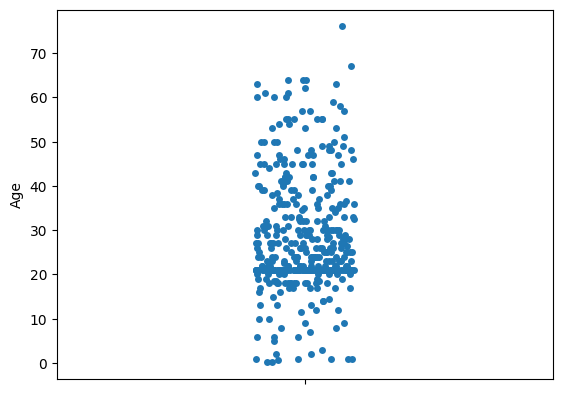

In [101]:
sns.stripplot(y=df_train['Age'])

<Axes: ylabel='Parch'>

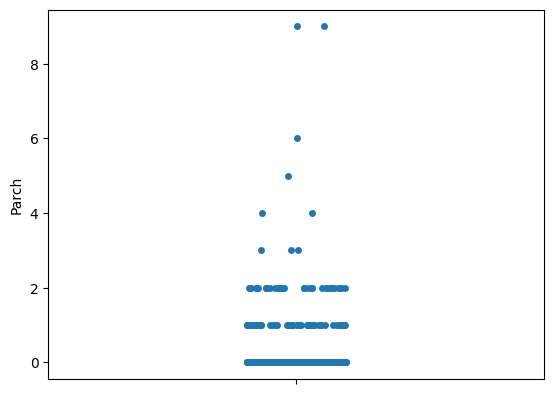

In [102]:
sns.stripplot(y=df_train['Parch'])

<Axes: ylabel='Ticket'>

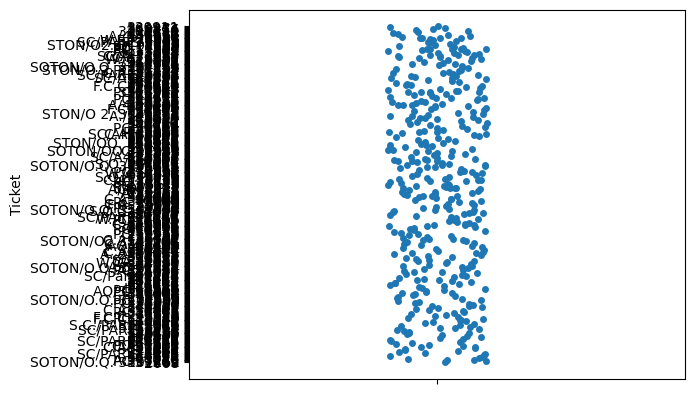

In [103]:
sns.stripplot(y=df_train['Ticket'])

<Axes: ylabel='Cabin'>

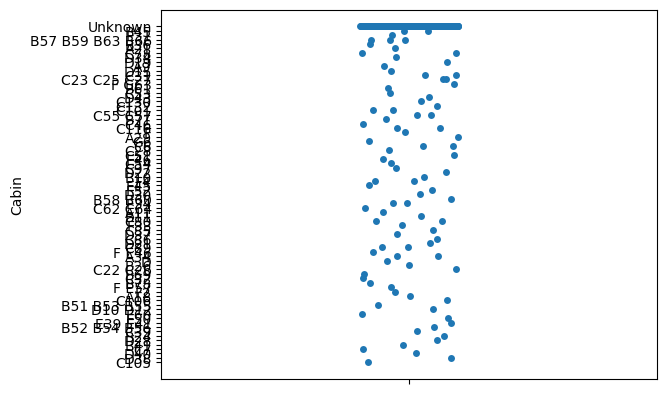

In [104]:
sns.stripplot(y=df_train['Cabin'])

<Axes: ylabel='Fare'>

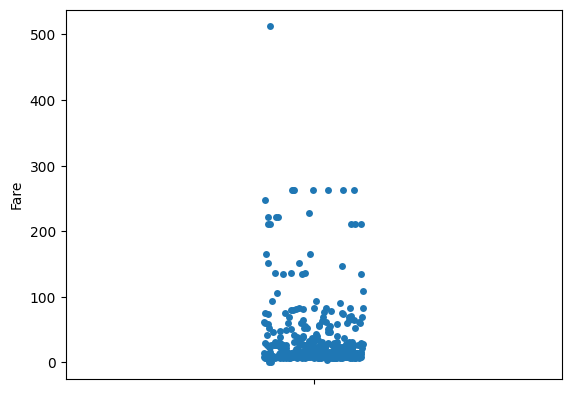

In [105]:
sns.stripplot(y=df_train['Fare'])

<Axes: ylabel='Embarked'>

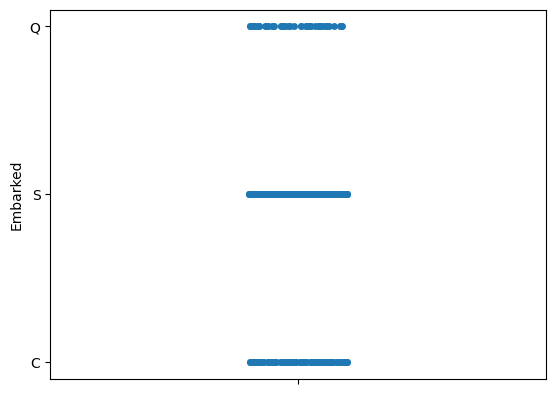

In [106]:
sns.stripplot(y=df_train['Embarked'])

In [112]:
#A histogram is a graph showing frequency distributions. It is a graph showing the number of observations within each given interval.

(array([42., 42., 42., 40., 42., 42., 41., 42., 42., 42.]),
 array([ 892. ,  933.7,  975.4, 1017.1, 1058.8, 1100.5, 1142.2, 1183.9,
        1225.6, 1267.3, 1309. ]),
 <BarContainer object of 10 artists>)

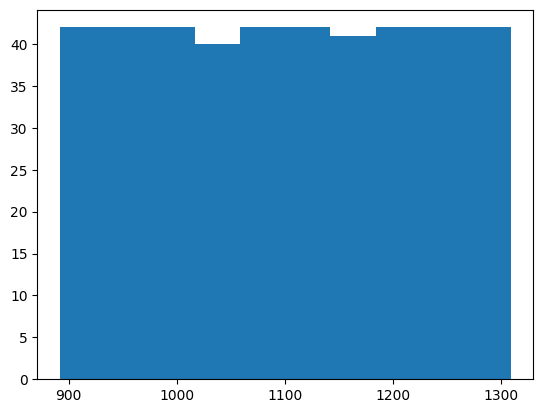

In [113]:
plt.hist(df_train['PassengerId'])

(array([265.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

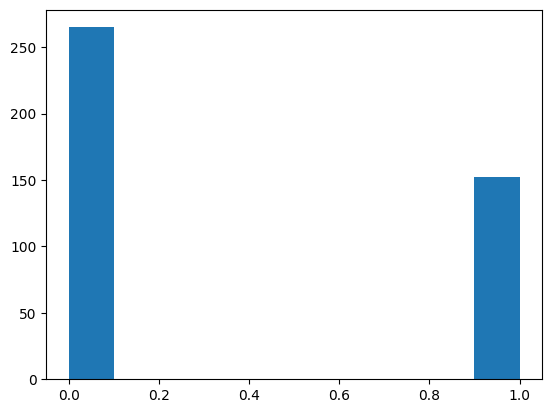

In [114]:
plt.hist(df_train['Survived'])

(array([107.,   0.,   0.,   0.,   0.,  93.,   0.,   0.,   0., 217.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

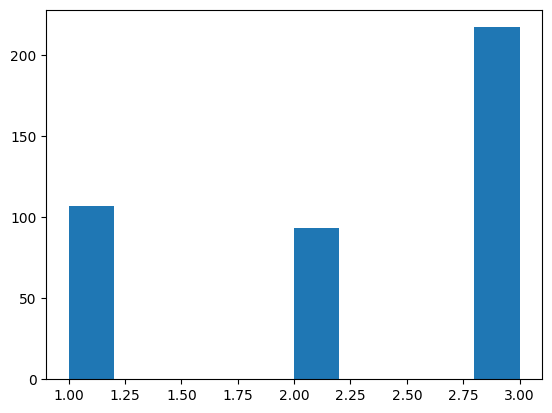

In [115]:
plt.hist(df_train['Pclass'])

(array([282., 110.,  14.,   4.,   0.,   4.,   1.,   0.,   0.,   2.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

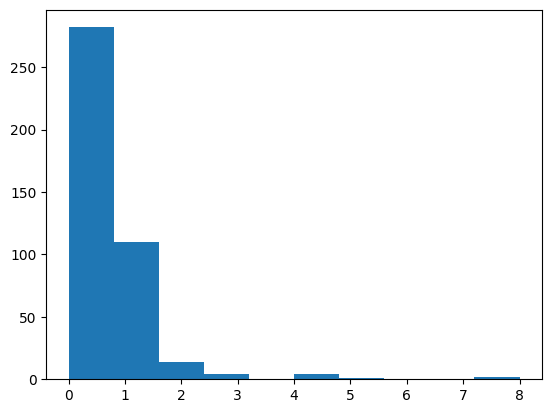

In [116]:
plt.hist(df_train['SibSp'])

(array([323.,  52.,  33.,   3.,   2.,   1.,   1.,   0.,   0.,   2.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

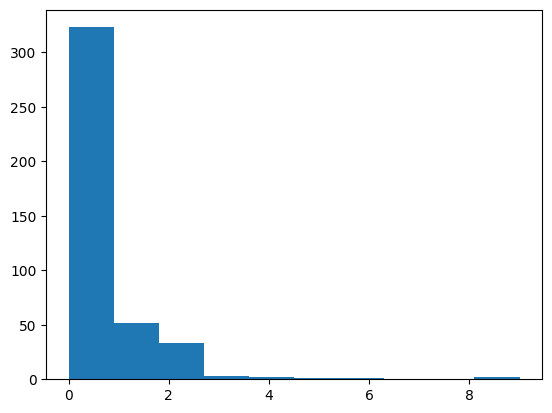

In [117]:
plt.hist(df_train['Parch'])

(array([49., 42., 43., 40., 51., 42., 38., 38., 37., 37.]),
 array([  0. ,  36.1,  72.2, 108.3, 144.4, 180.5, 216.6, 252.7, 288.8,
        324.9, 361. ]),
 <BarContainer object of 10 artists>)

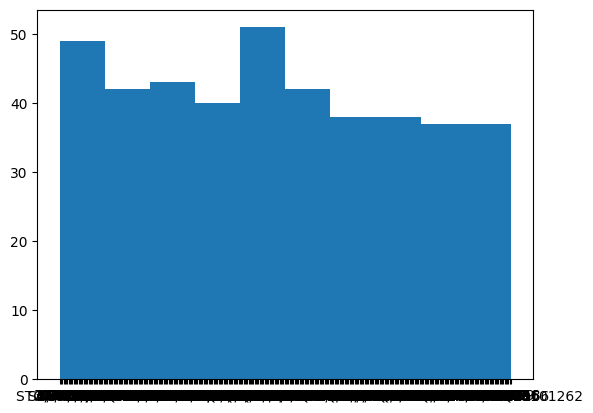

In [118]:
plt.hist(df_train['Ticket'])

(array([338.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

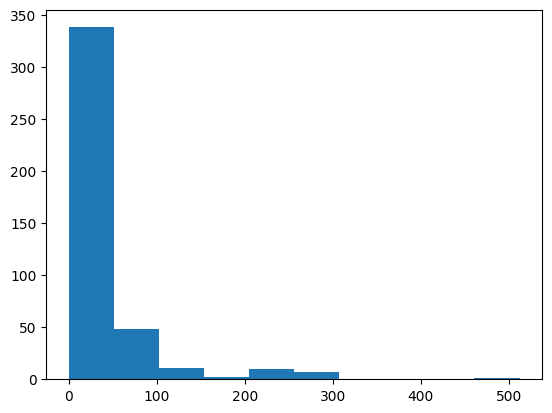

In [119]:
plt.hist(df_train['Fare'])

(array([337.,  10.,   9.,  10.,   8.,  10.,  10.,   7.,   8.,   8.]),
 array([ 0. ,  7.6, 15.2, 22.8, 30.4, 38. , 45.6, 53.2, 60.8, 68.4, 76. ]),
 <BarContainer object of 10 artists>)

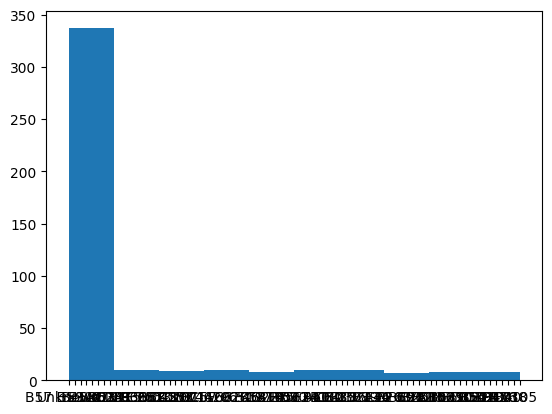

In [120]:
plt.hist(df_train['Cabin'])

(array([ 46.,   0.,   0.,   0.,   0., 269.,   0.,   0.,   0., 102.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

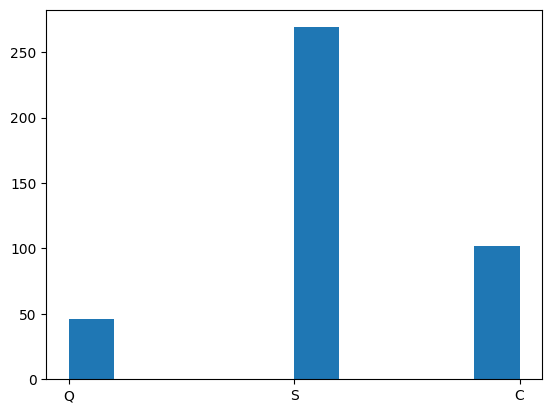

In [121]:
plt.hist(df_train['Embarked'])

In [122]:
#Bivariate analysis

In [123]:
#Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent.

<Axes: ylabel='PassengerId'>

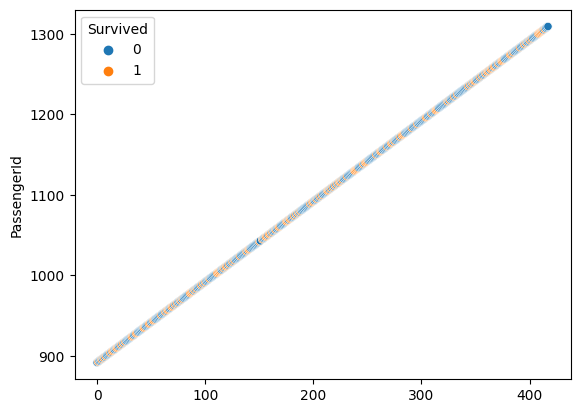

In [124]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Survived'])

<Axes: ylabel='PassengerId'>

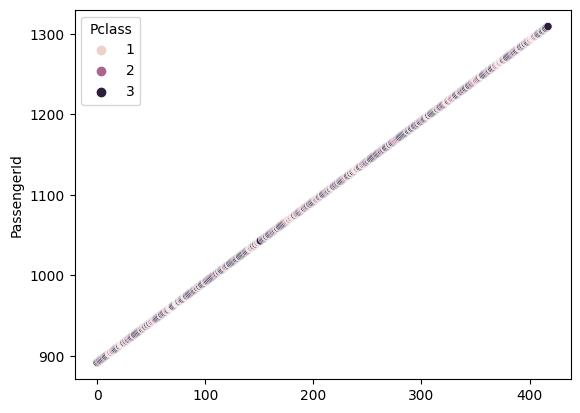

In [125]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Pclass'])

<Axes: ylabel='PassengerId'>

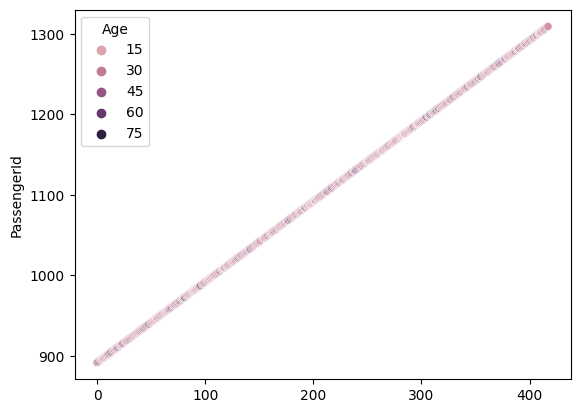

In [126]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Age'])

<Axes: ylabel='PassengerId'>

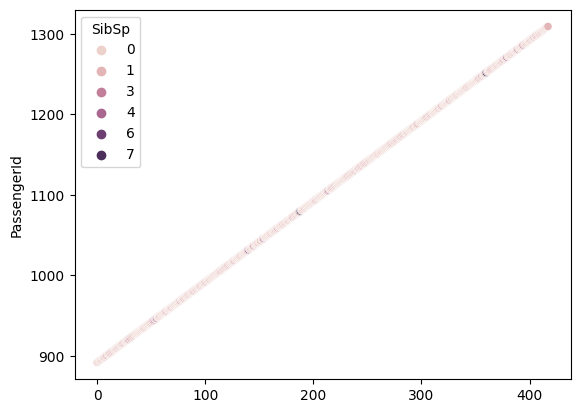

In [127]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['SibSp'])

<Axes: ylabel='PassengerId'>

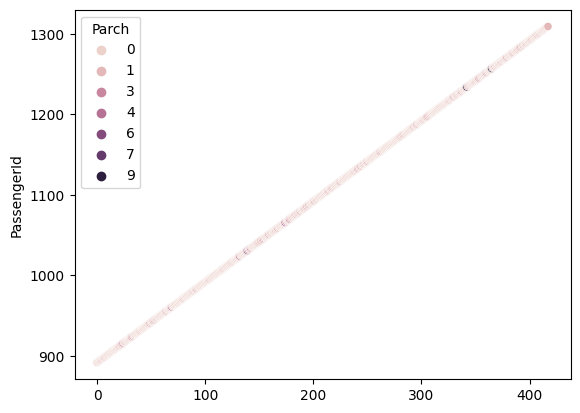

In [128]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Parch'])

<Axes: ylabel='PassengerId'>

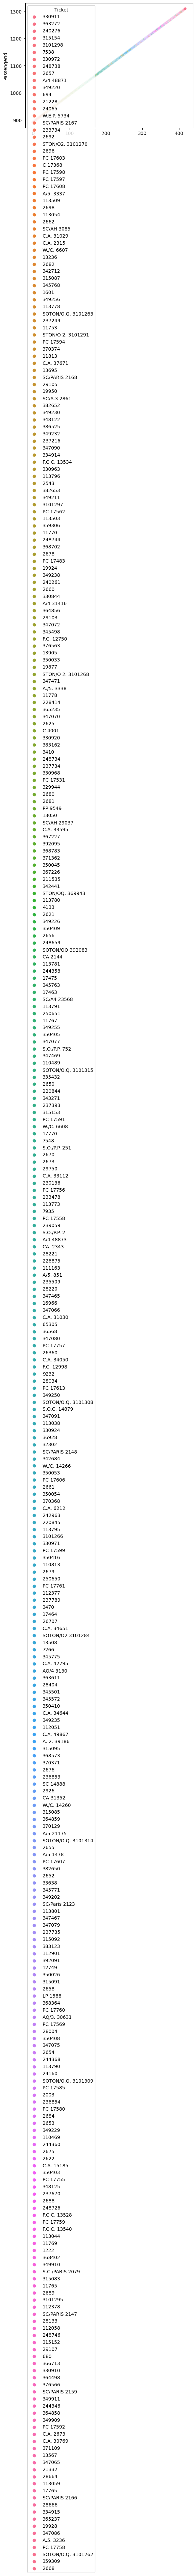

In [129]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Ticket'])

<Axes: ylabel='PassengerId'>

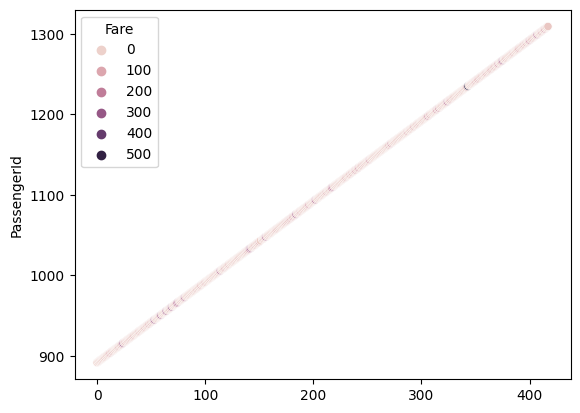

In [130]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Fare'])

<Axes: ylabel='PassengerId'>

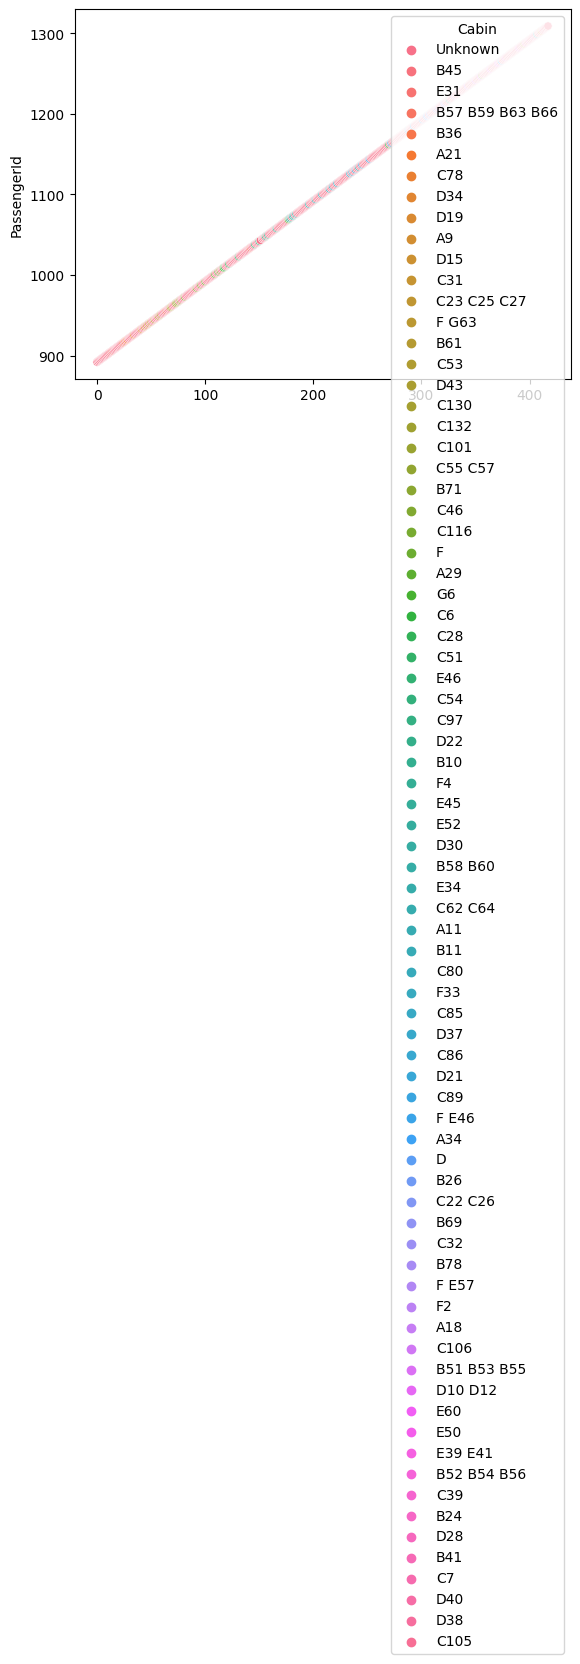

In [131]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Cabin'])

<Axes: ylabel='PassengerId'>

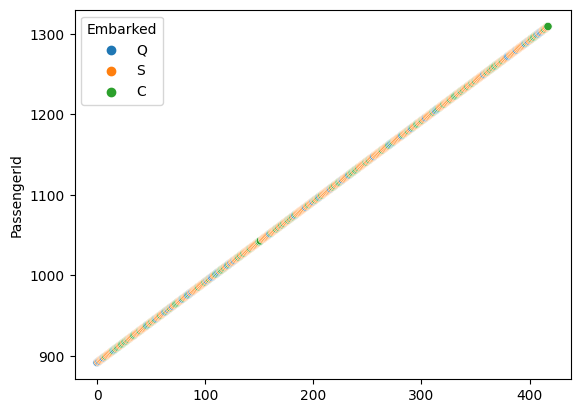

In [132]:
sns.scatterplot(x=df_train.index,y=df_train['PassengerId'],hue=df_train['Embarked'])

<Axes: ylabel='Survived'>

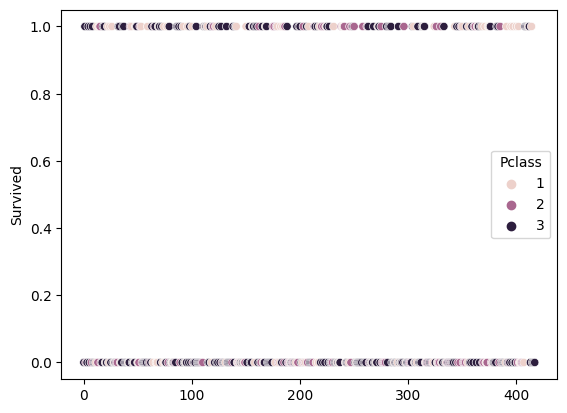

In [133]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['Pclass'])

<Axes: ylabel='Survived'>

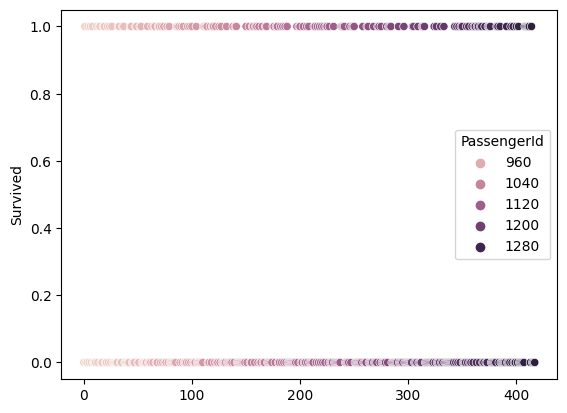

In [134]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['PassengerId'])

<Axes: ylabel='Survived'>

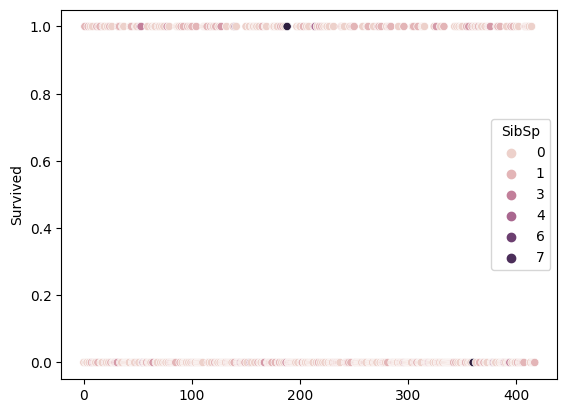

In [135]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['SibSp'])

<Axes: ylabel='Survived'>

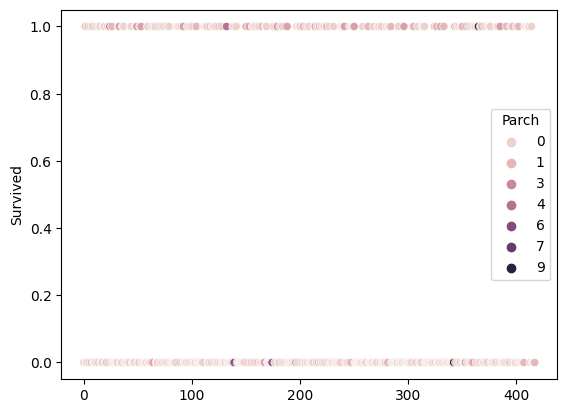

In [136]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['Parch'])

<Axes: ylabel='Survived'>

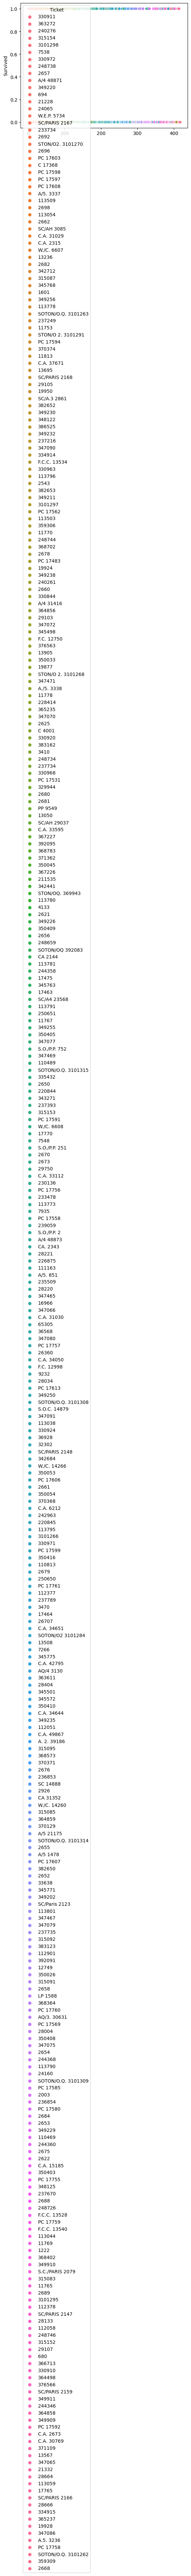

In [137]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['Ticket'])

<Axes: ylabel='Survived'>

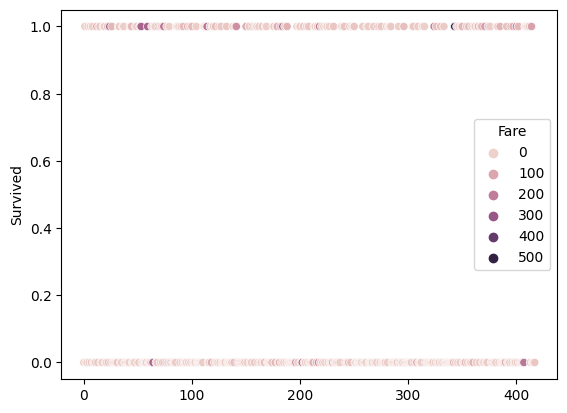

In [138]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['Fare'])

<Axes: ylabel='Survived'>

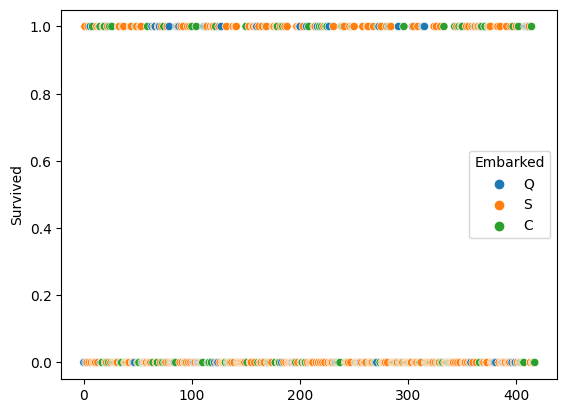

In [139]:
sns.scatterplot(x=df_train.index,y=df_train['Survived'],hue=df_train['Embarked'])

<Axes: ylabel='Pclass'>

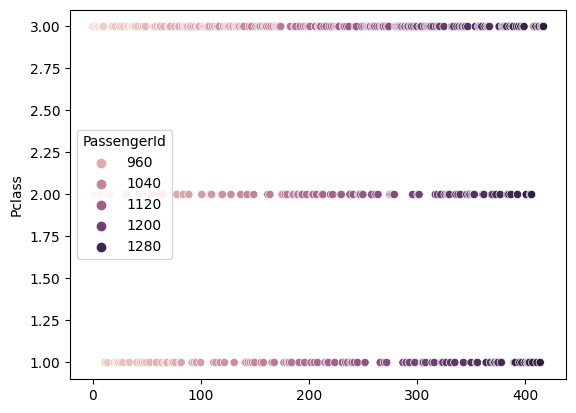

In [140]:
sns.scatterplot(x=df_train.index,y=df_train['Pclass'],hue=df_train['PassengerId'])

<Axes: ylabel='Pclass'>

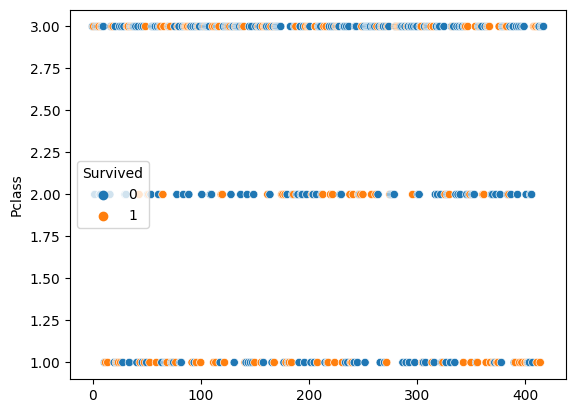

In [141]:
sns.scatterplot(x=df_train.index,y=df_train['Pclass'],hue=df_train['Survived'])

<Axes: ylabel='Pclass'>

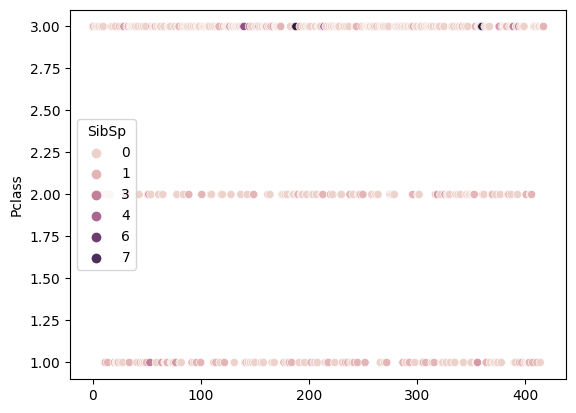

In [142]:
sns.scatterplot(x=df_train.index,y=df_train['Pclass'],hue=df_train['SibSp'])

<Axes: ylabel='Pclass'>

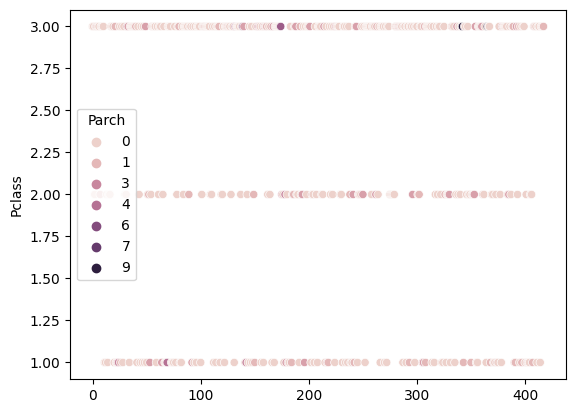

In [143]:
sns.scatterplot(x=df_train.index,y=df_train['Pclass'],hue=df_train['Parch'])

<Axes: ylabel='Pclass'>

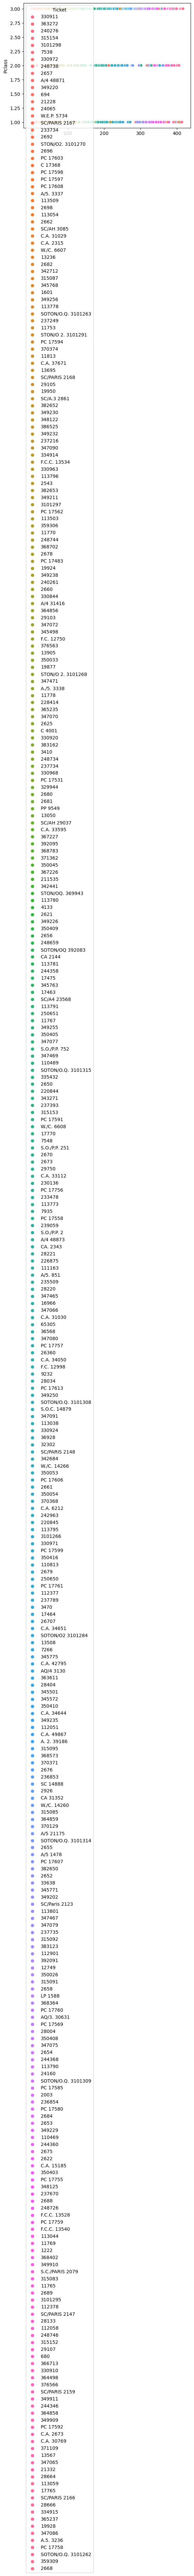

In [144]:
sns.scatterplot(x=df_train.index,y=df_train['Pclass'],hue=df_train['Ticket'])

<Axes: ylabel='SibSp'>

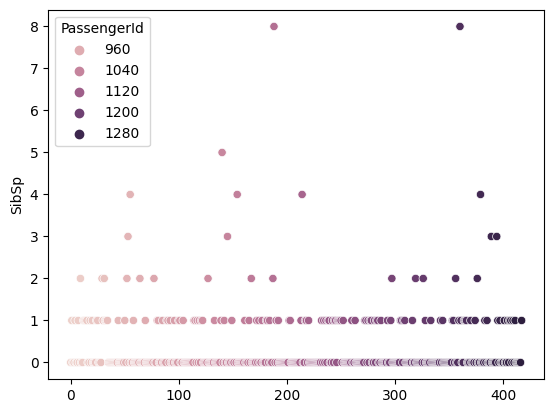

In [145]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['PassengerId'])

<Axes: ylabel='SibSp'>

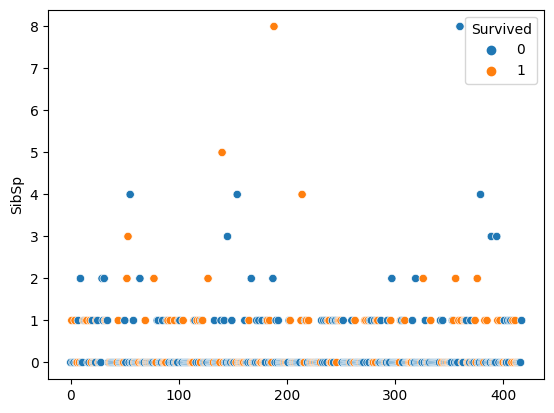

In [146]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Survived'])

<Axes: ylabel='SibSp'>

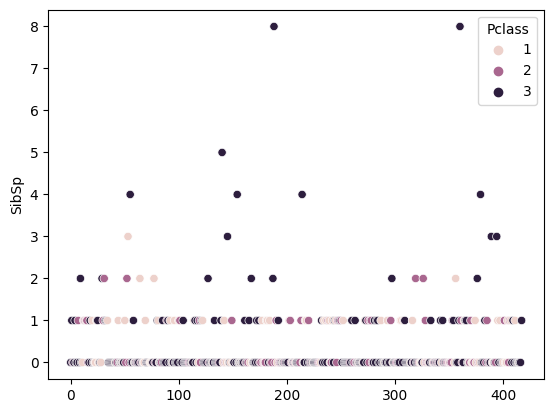

In [147]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Pclass'])

<Axes: ylabel='SibSp'>

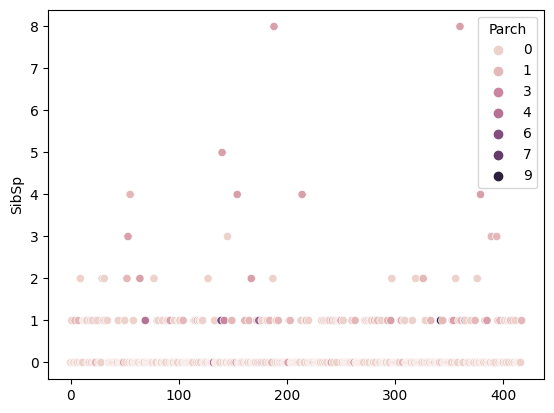

In [148]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Parch'])

<Axes: ylabel='SibSp'>

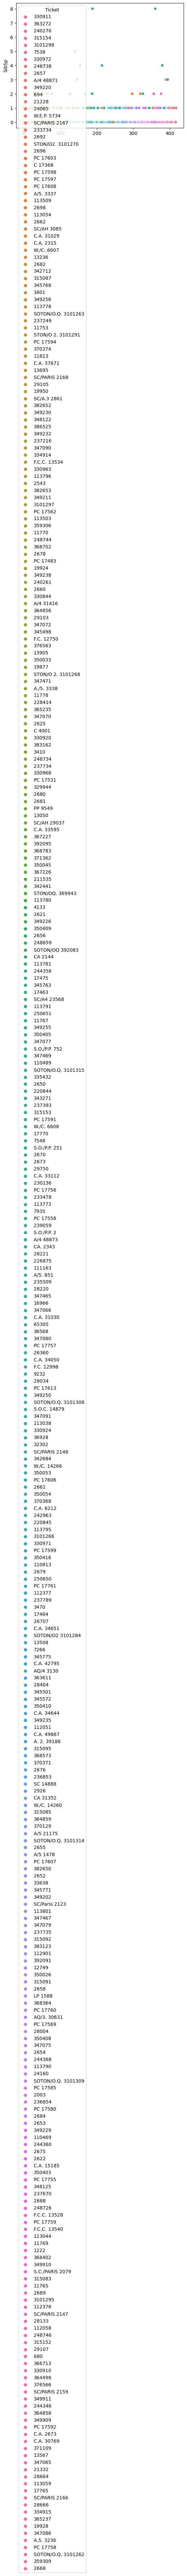

In [149]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Ticket'])

<Axes: ylabel='SibSp'>

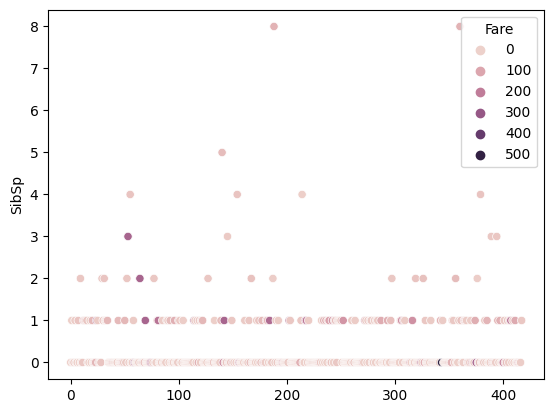

In [150]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Fare'])

<Axes: ylabel='SibSp'>

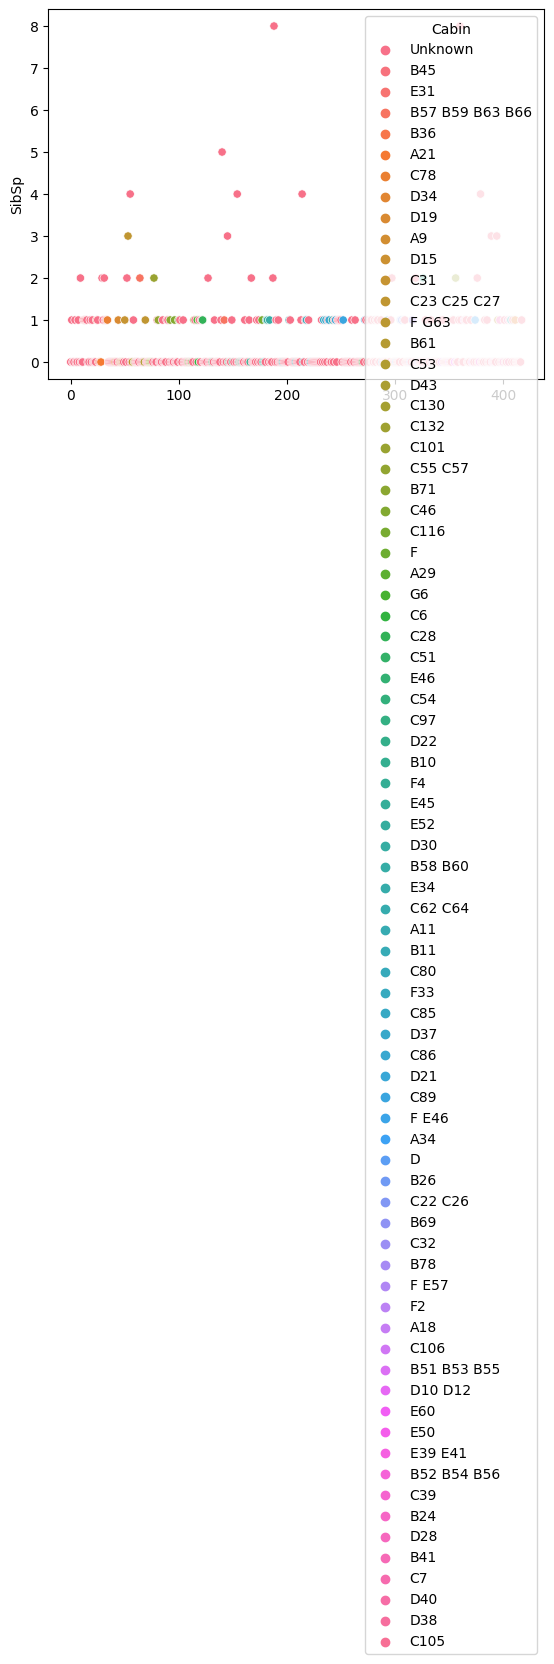

In [151]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Cabin'])

<Axes: ylabel='SibSp'>

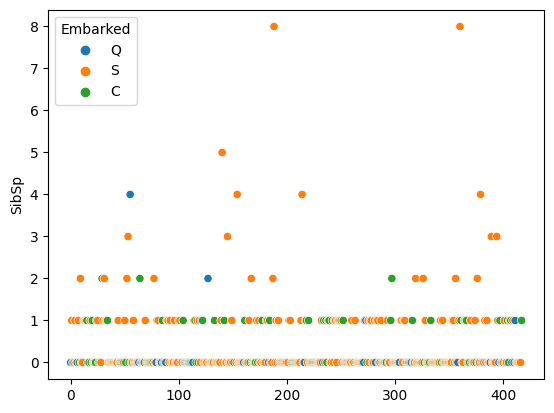

In [154]:
sns.scatterplot(x=df_train.index,y=df_train['SibSp'],hue=df_train['Embarked'])

<Axes: xlabel='PassengerId', ylabel='Survived'>

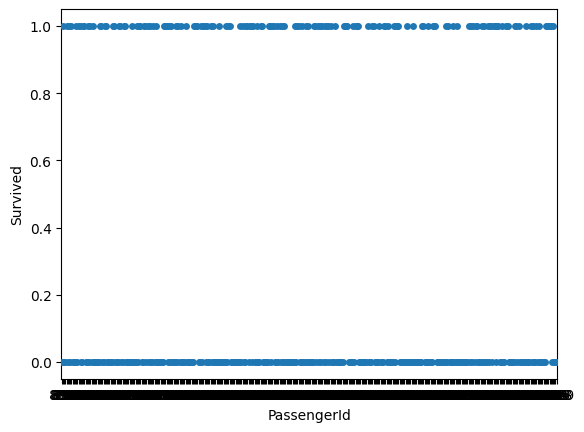

In [155]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Survived'])

<Axes: xlabel='PassengerId', ylabel='Pclass'>

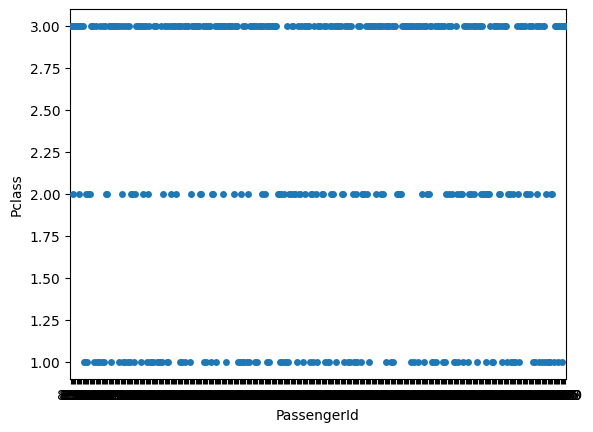

In [156]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Pclass'])

<Axes: xlabel='PassengerId', ylabel='SibSp'>

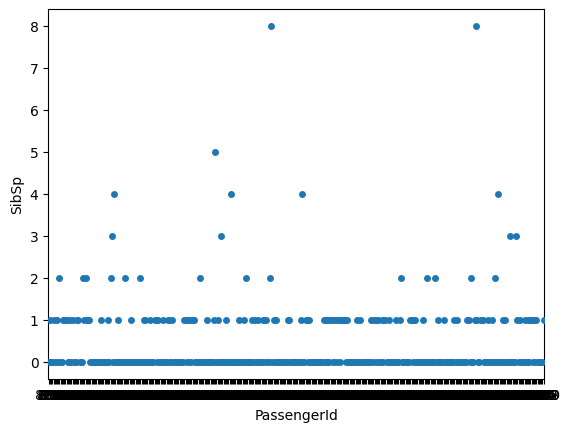

In [157]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['SibSp'])

<Axes: xlabel='PassengerId', ylabel='Parch'>

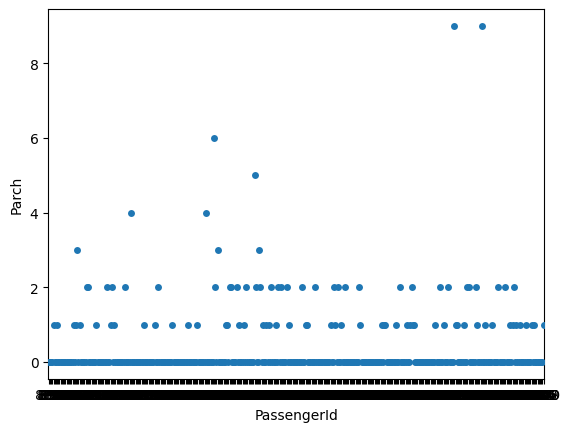

In [158]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Parch'])

<Axes: xlabel='PassengerId', ylabel='Ticket'>

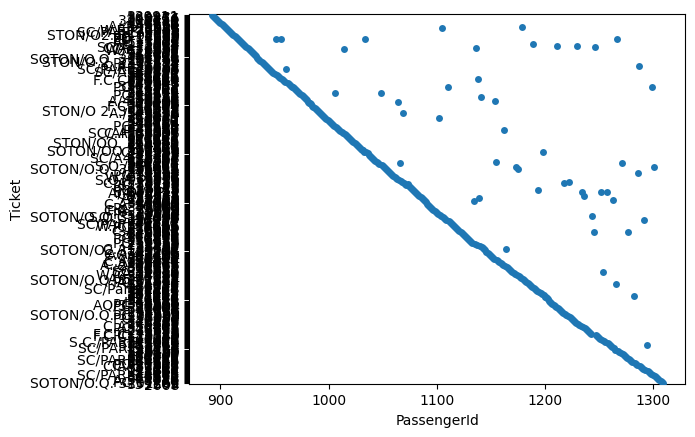

In [159]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Ticket'])

<Axes: xlabel='PassengerId', ylabel='Fare'>

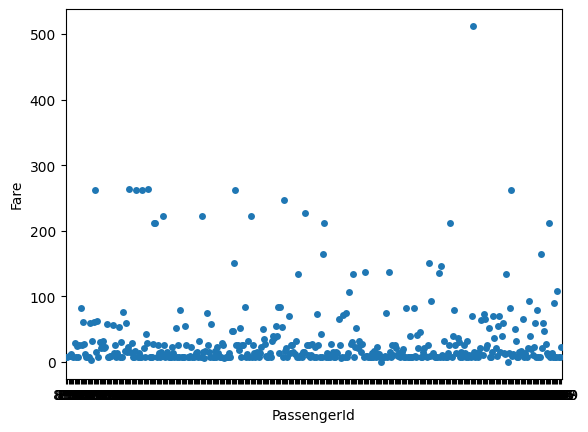

In [160]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Fare'])

<Axes: xlabel='PassengerId', ylabel='Cabin'>

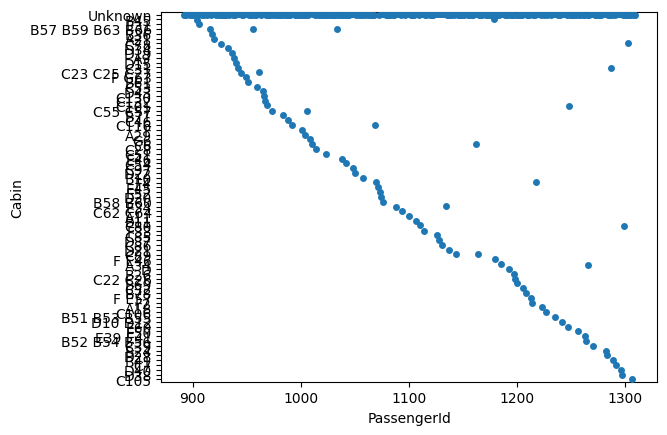

In [161]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Cabin'])

<Axes: xlabel='PassengerId', ylabel='Embarked'>

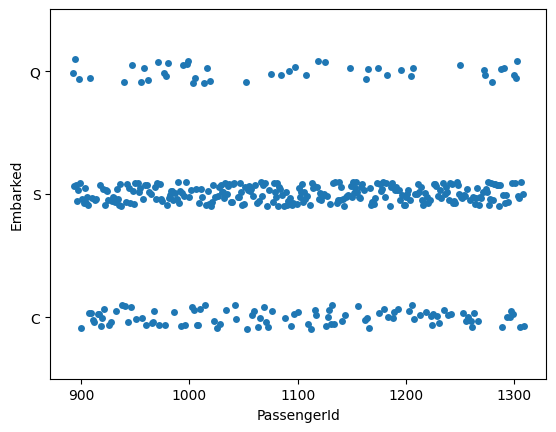

In [162]:
sns.stripplot(x=df_train['PassengerId'],y=df_train['Embarked'])

<Axes: xlabel='Survived', ylabel='PassengerId'>

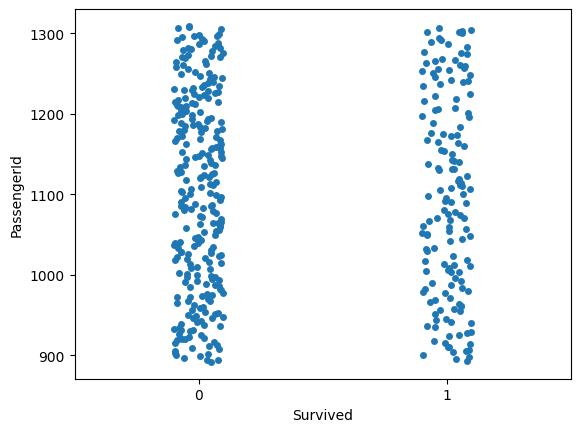

In [163]:
sns.stripplot(x=df_train['Survived'],y=df_train['PassengerId'])

<Axes: xlabel='Survived', ylabel='Pclass'>

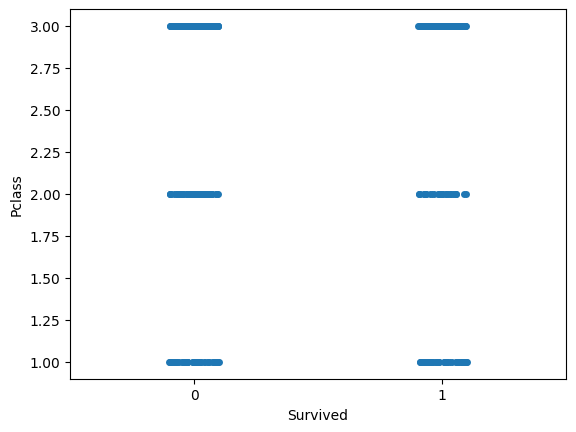

In [164]:
sns.stripplot(x=df_train['Survived'],y=df_train['Pclass'])

<Axes: xlabel='Survived', ylabel='SibSp'>

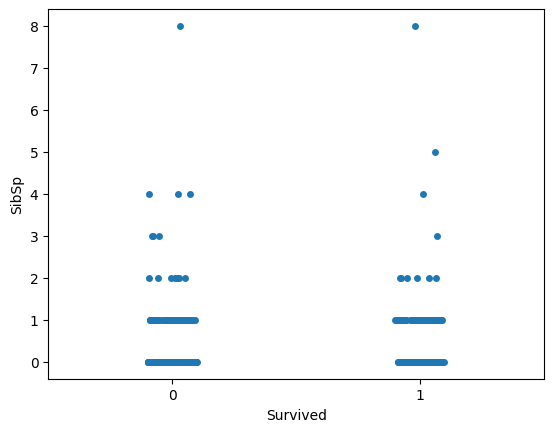

In [165]:
sns.stripplot(x=df_train['Survived'],y=df_train['SibSp'])

<Axes: xlabel='Survived', ylabel='Parch'>

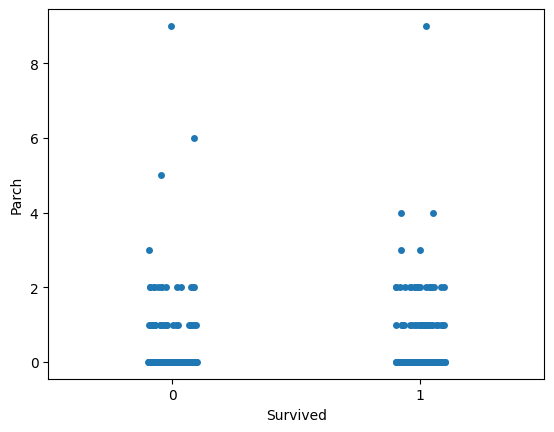

In [166]:
sns.stripplot(x=df_train['Survived'],y=df_train['Parch'])

<Axes: xlabel='Survived', ylabel='Ticket'>

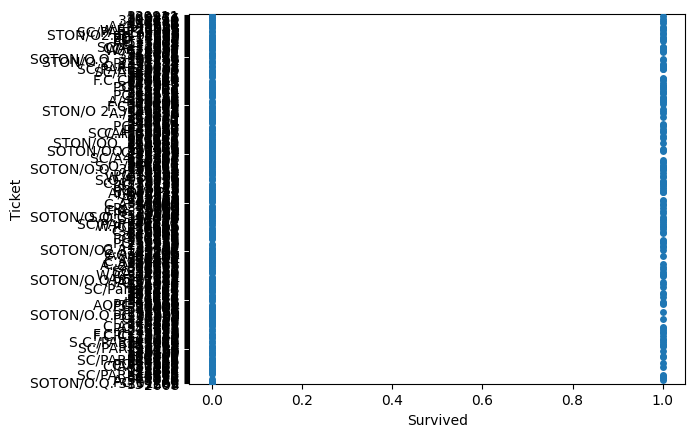

In [167]:
sns.stripplot(x=df_train['Survived'],y=df_train['Ticket'])

<Axes: xlabel='Survived', ylabel='Fare'>

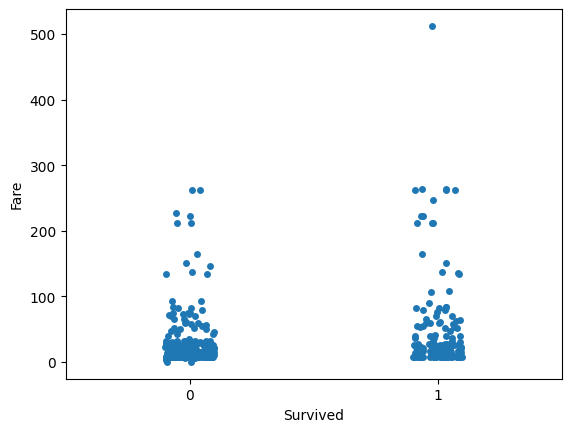

In [168]:
sns.stripplot(x=df_train['Survived'],y=df_train['Fare'])

<Axes: xlabel='Survived', ylabel='Cabin'>

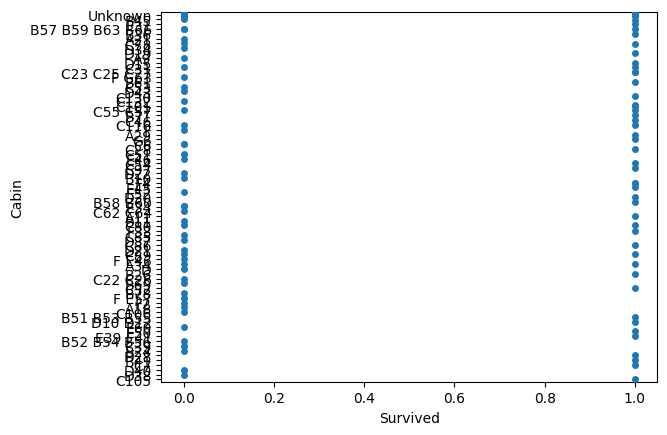

In [169]:
sns.stripplot(x=df_train['Survived'],y=df_train['Cabin'])

<Axes: xlabel='Survived', ylabel='Embarked'>

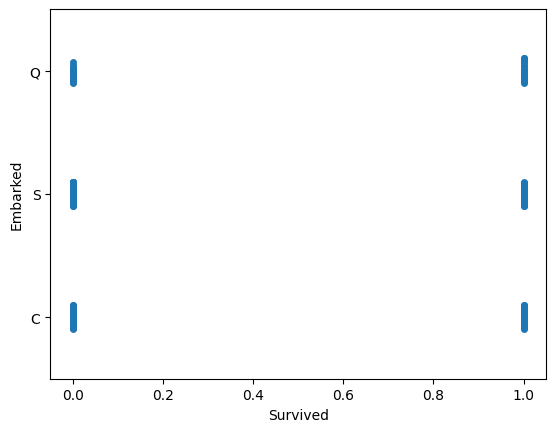

In [170]:
sns.stripplot(x=df_train['Survived'],y=df_train['Embarked'])

<Axes: xlabel='Pclass', ylabel='PassengerId'>

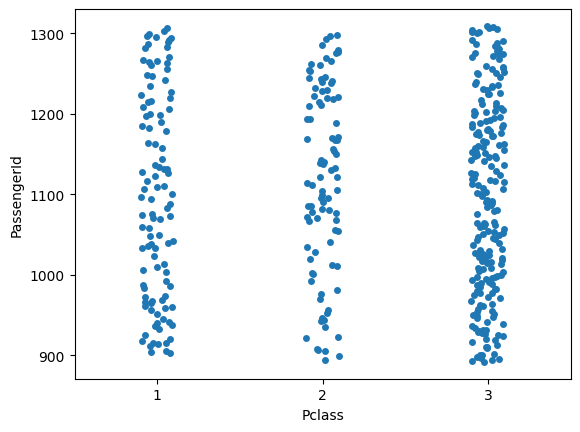

In [171]:
sns.stripplot(x=df_train['Pclass'],y=df_train['PassengerId'])

<Axes: xlabel='Pclass', ylabel='Survived'>

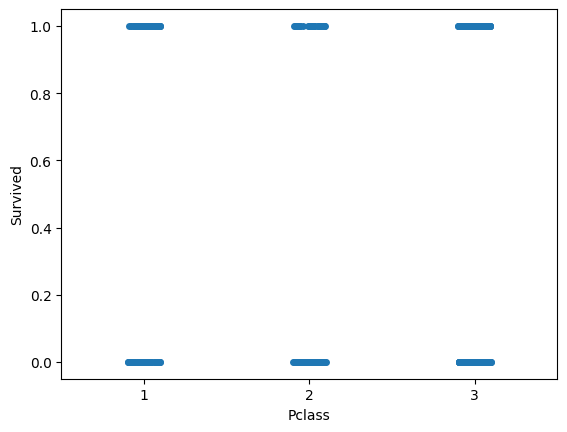

In [172]:
sns.stripplot(x=df_train['Pclass'],y=df_train['Survived'])

<Axes: xlabel='Pclass', ylabel='SibSp'>

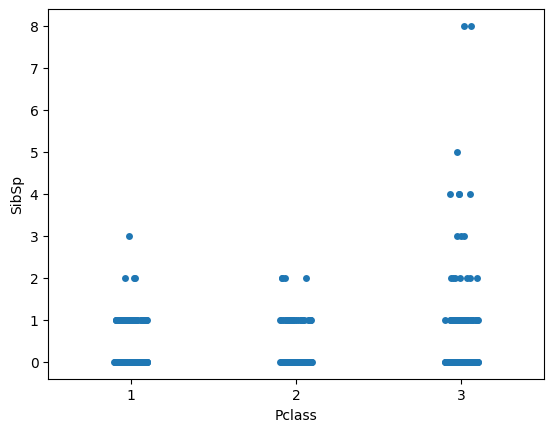

In [173]:
sns.stripplot(x=df_train['Pclass'],y=df_train['SibSp'])

<Axes: xlabel='Pclass', ylabel='Parch'>

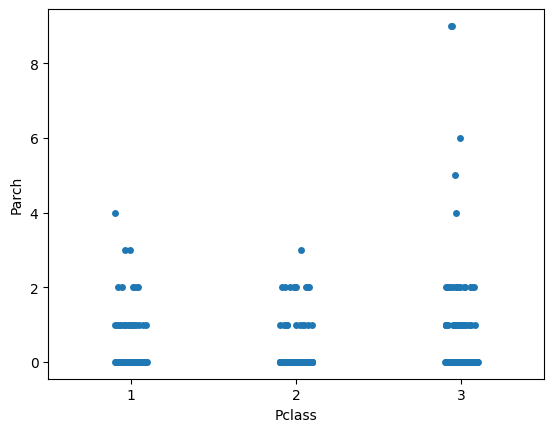

In [174]:
sns.stripplot(x=df_train['Pclass'],y=df_train['Parch'])

<Axes: xlabel='Pclass', ylabel='Ticket'>

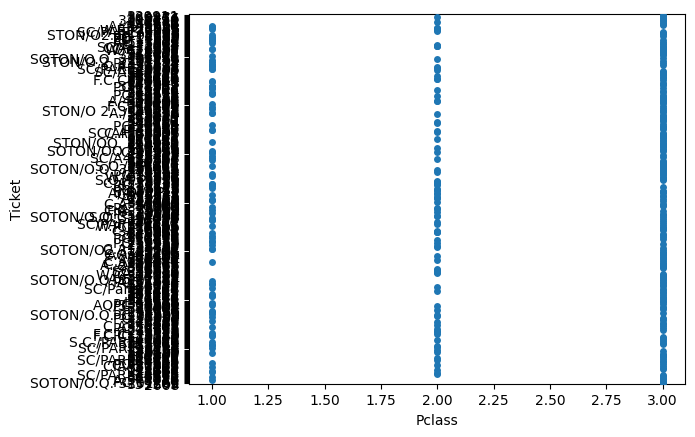

In [175]:
sns.stripplot(x=df_train['Pclass'],y=df_train['Ticket'])

<Axes: xlabel='Pclass', ylabel='Fare'>

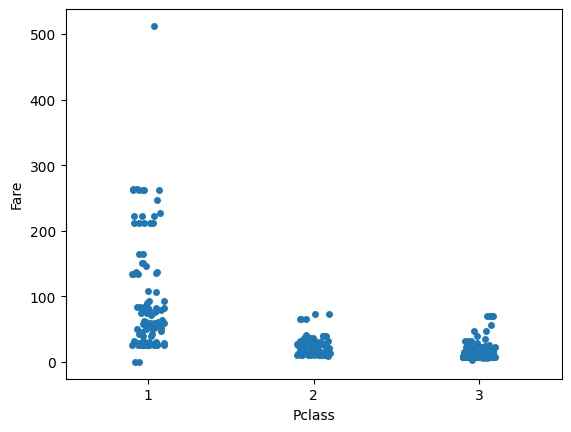

In [176]:
sns.stripplot(x=df_train['Pclass'],y=df_train['Fare'])

<Axes: xlabel='Pclass', ylabel='Cabin'>

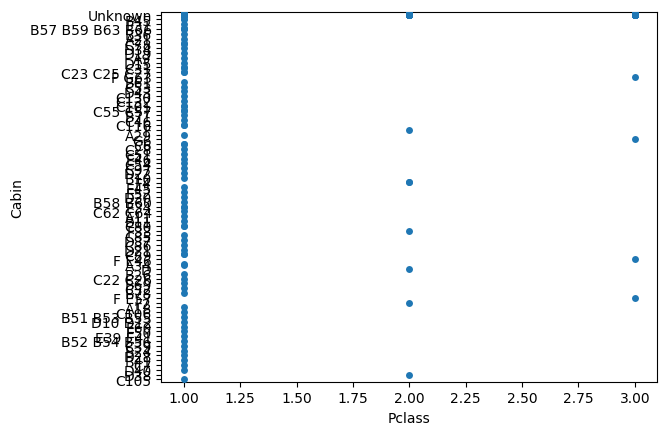

In [177]:
sns.stripplot(x=df_train['Pclass'],y=df_train['Cabin'])

<Axes: xlabel='Pclass', ylabel='Embarked'>

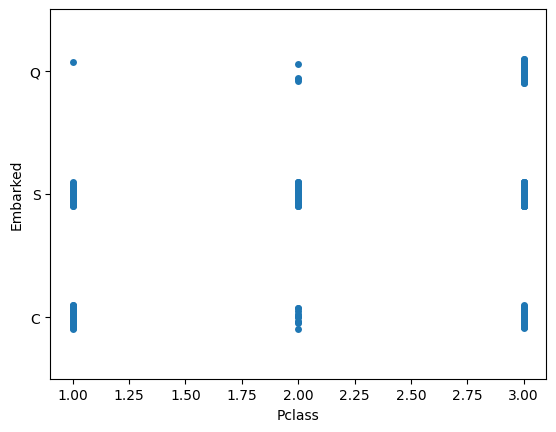

In [178]:
sns.stripplot(x=df_train['Pclass'],y=df_train['Embarked'])

<Axes: xlabel='Age', ylabel='PassengerId'>

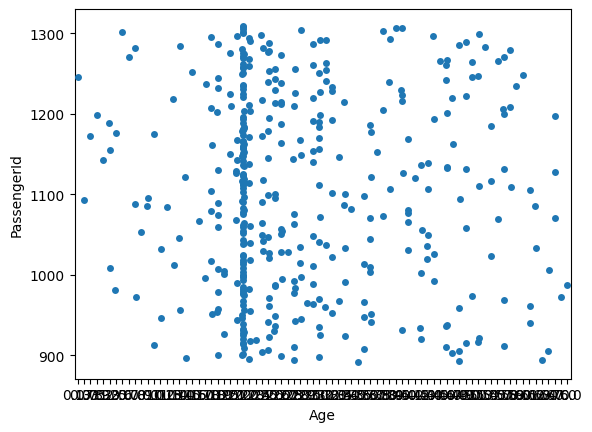

In [179]:
sns.stripplot(x=df_train['Age'],y=df_train['PassengerId'])

<Axes: xlabel='Age', ylabel='Survived'>

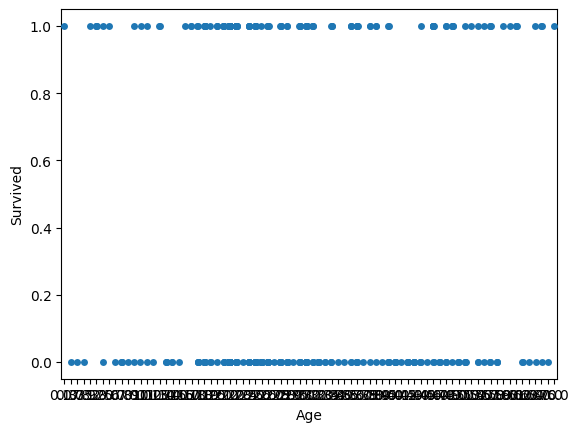

In [180]:
sns.stripplot(x=df_train['Age'],y=df_train['Survived'])

<Axes: xlabel='Age', ylabel='Pclass'>

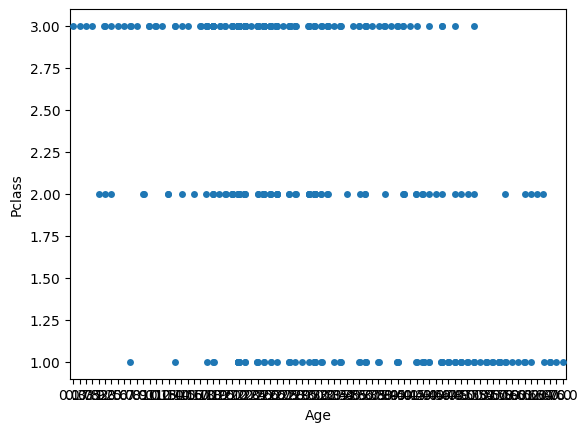

In [181]:
sns.stripplot(x=df_train['Age'],y=df_train['Pclass'])

<Axes: xlabel='Age', ylabel='Ticket'>

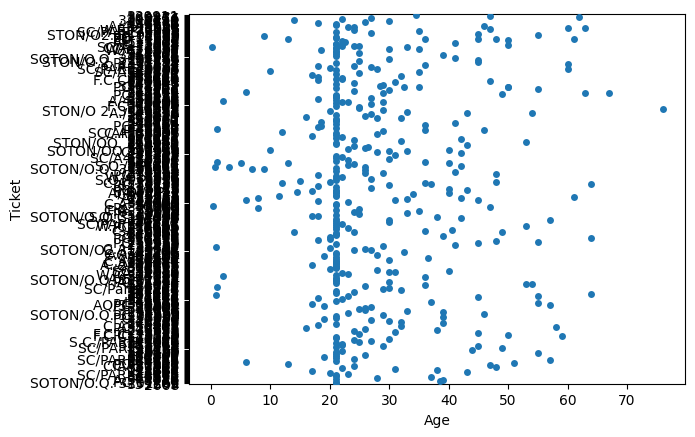

In [182]:
sns.stripplot(x=df_train['Age'],y=df_train['Ticket'])

<Axes: xlabel='Age', ylabel='Cabin'>

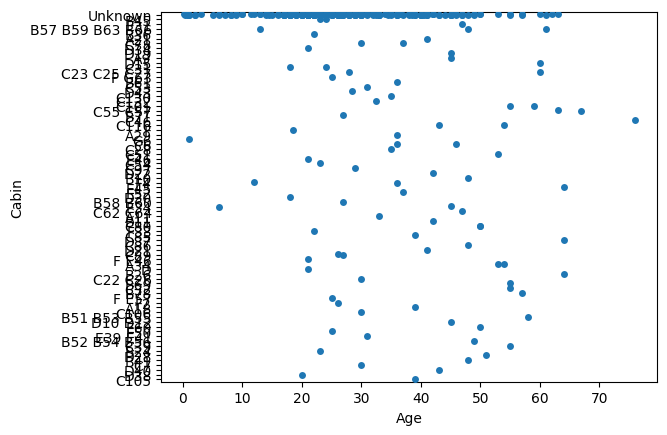

In [183]:
sns.stripplot(x=df_train['Age'],y=df_train['Cabin'])

<Axes: xlabel='Age', ylabel='Cabin'>

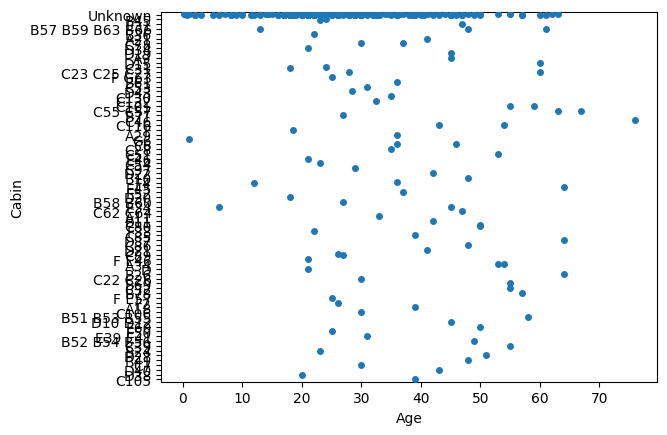

In [184]:
sns.stripplot(x=df_train['Age'],y=df_train['Cabin'])

<Axes: xlabel='Age', ylabel='Embarked'>

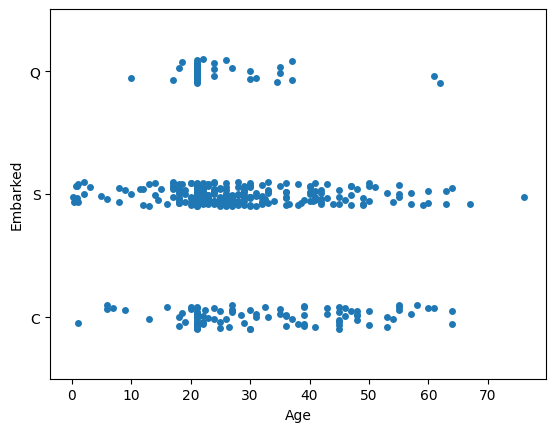

In [185]:
sns.stripplot(x=df_train['Age'],y=df_train['Embarked'])

In [186]:
#Correlation

In [187]:
df_2 = df_train.drop(['Name', 'Ticket','Cabin','PassengerId'], axis=1) # drop the name ,ticket,cabin,passengerid columns

In [188]:
df_2

Survived  Pclass  Sex   Age  SibSp  Parch      Fare Embarked
0           0       3    1  34.5      0      0    7.8292        Q
1           1       3    2  47.0      1      0    7.0000        S
2           0       2    1  62.0      0      0    9.6875        Q
3           0       3    1  27.0      0      0    8.6625        S
4           1       3    2  22.0      1      1   12.2875        S
..        ...     ...  ...   ...    ...    ...       ...      ...
413         0       3    1  21.0      0      0    8.0500        S
414         1       1    2  39.0      0      0  108.9000        C
415         0       3    1  38.5      0      0    7.2500        S
416         0       3    1  21.0      0      0    8.0500        S
417         0       3    1  21.0      1      1   22.3583        C

[417 rows x 8 columns]

In [191]:
df_2['Embarked']=df_2['Embarked'].replace("S",1)

In [192]:
df_2['Embarked']=df_2['Embarked'].replace("Q",2)

In [193]:
df_2['Embarked']=df_2['Embarked'].replace("C",3)

In [194]:
df_2['Embarked'].value_counts()

Embarked
1    269
3    102
2     46
Name: count, dtype: int64

In [195]:
#data preprocessing

In [196]:
#correlation The corr() method calculates the relationship between each column in your data set.

<Axes: >

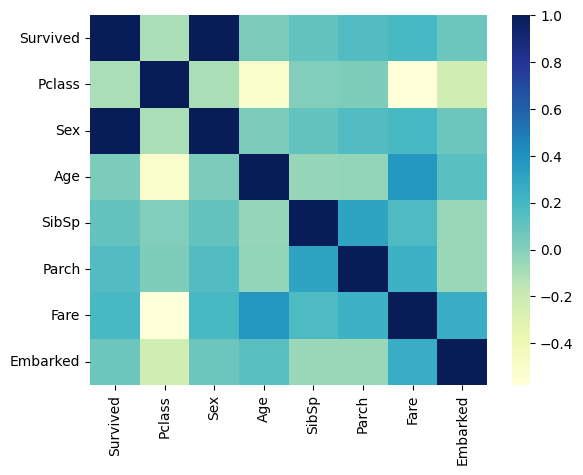

In [198]:
sns.heatmap(df_2.corr(),cmap="YlGnBu") # In this Heatmap , sex and survived have high relationship compare to rest of the column


In [199]:
#feature Scaling

In [200]:
#Data standardization is converting data into a standard format that computers can easily understand and use. 

In [201]:

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(df_2)

# Perform standardization on the DataFrame
df_standardized = scaler.transform(df_2)
# Convert the standardized array back to a DataFrame
df_standardized = pd.DataFrame(df_standardized, columns=df_2.columns)
df_standardized

Survived    Pclass       Sex       Age     SibSp     Parch      Fare  \
0   -0.757354  0.875330 -0.757354  0.474738 -0.500218 -0.400804 -0.497811   
1    1.320387  0.875330  1.320387  1.429986  0.615242 -0.400804 -0.512660   
2   -0.757354 -0.313636 -0.757354  2.576283 -0.500218 -0.400804 -0.464532   
3   -0.757354  0.875330 -0.757354 -0.098411 -0.500218 -0.400804 -0.482888   
4    1.320387  0.875330  1.320387 -0.480510  0.615242  0.618314 -0.417971   
..        ...       ...       ...       ...       ...       ...       ...   
412 -0.757354  0.875330 -0.757354 -0.556930 -0.500218 -0.400804 -0.493856   
413  1.320387 -1.502602  1.320387  0.818627 -0.500218 -0.400804  1.312180   
414 -0.757354  0.875330 -0.757354  0.780417 -0.500218 -0.400804 -0.508183   
415 -0.757354  0.875330 -0.757354 -0.556930 -0.500218 -0.400804 -0.493856   
416 -0.757354  0.875330 -0.757354 -0.556930  0.615242  0.618314 -0.237621   

     Embarked  
0    0.468949  
1   -0.702020  
2    0.468949  
3   -0.702020  
4   -0.702020  
..        ...  
412 -0.702020  
413  1.639919  
414 -0.702020  
415 -0.702020  
416  1.639919  

[417 rows x 8 columns]

In [203]:
#normalization

In [202]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data
scaler.fit(df_2)

# Perform normalization on the DataFrame
df_normalized = scaler.transform(df_2)

# Convert the normalized array back to a DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df_2.columns)

# Print the normalized DataFrame
df_normalized

Survived  Pclass  Sex       Age  SibSp     Parch      Fare  Embarked
0         0.0     1.0  0.0  0.452723  0.000  0.000000  0.015282       0.5
1         1.0     1.0  1.0  0.617566  0.125  0.000000  0.013663       0.0
2         0.0     0.5  0.0  0.815377  0.000  0.000000  0.018909       0.5
3         0.0     1.0  0.0  0.353818  0.000  0.000000  0.016908       0.0
4         1.0     1.0  1.0  0.287881  0.125  0.111111  0.023984       0.0
..        ...     ...  ...       ...    ...       ...       ...       ...
412       0.0     1.0  0.0  0.274693  0.000  0.000000  0.015713       0.0
413       1.0     0.0  1.0  0.512066  0.000  0.000000  0.212559       1.0
414       0.0     1.0  0.0  0.505473  0.000  0.000000  0.014151       0.0
415       0.0     1.0  0.0  0.274693  0.000  0.000000  0.015713       0.0
416       0.0     1.0  0.0  0.274693  0.125  0.111111  0.043640       1.0

[417 rows x 8 columns]